## Numeric vs symbolic computing

In [1]:
1.01 - 1

0.010000000000000009

Floating point numbers have limited accuracy (53 bits for double precision IEEE 754)

In [3]:
import math
math.log10(2**53)

15.954589770191003

That is, about 15 decimal places. Additionally, decimal numbers don't have exact representation in binary in general. In some cases, it may lead to accumulation of errors (numerically unstable algorithms)

In [3]:
x = 1
for i in range(10):
    x = (1.01-x)*100
    print(x)

1.0000000000000009
0.9999999999999121
1.0000000000087939
0.9999999991206154
1.0000000879384574
0.9999912061542604
1.0008793845739605
0.912061542603948
9.7938457396052
-878.38457396052


## SymPy as a calculator

Symbolic computing uses exact mathematical rules. Numbers in sympy are represented by objects of type Integer, Rational, and Float and they have overloaded mathematical operators

In [4]:
from sympy import *

In [5]:
Rational(101, 100)-Integer(1)

1/100

In [6]:
sympify("101/100-1")

1/100

In [7]:
nsimplify("1.01") - 1

1/100

In [8]:
x = Integer(1)
for i in range(10):
    x = (Rational(101, 100)-x)*100
    print(x)

1
1
1
1
1
1
1
1
1
1


Sympy has some predefined mathematical constants

In [5]:
E*I - pi

-pi + E*I

and many functions...

In [10]:
cos(0)

1

In [11]:
sin(pi/3)

sqrt(3)/2

and you can evaluate the expressions numerically with function N() or method .evalf() with arbirtary precision (based on mpmath)

In [6]:
N(pi+E*I, 30)

3.14159265358979323846264338328 + 2.71828182845904523536028747135*I

In [8]:
sqrt(2).evalf(1000)*2

2.82842712474619009760337744841939615713934375075389614635335947598146495692421407770077506865528314547002769246182459404984967211170147442528824299419987166282644533185501118551159990100230556412114294021911994321194054906919372402945703483728177839721910465846096861742864290167952520725599050281597937450679309266361765928124123051670479010949150057551992345967115044067506371402270874920681699769432077379994139800963006108805558063290849564613698587383724316115692622319333742602603123713797447447057701852972249899543084366684085713721202936494415428717097483113141393553074404529708940317176032415169498453144520041711689330429167977878887418531836006227764929363141652602011897174080063729606843897945565812820901452737626274797105122346440804901824554004538822551472545609914762179350080367397367369014515987294581215259938827609513096474579943606536049488412585382497181043620089196843011822404988826834570629562116072067421546183657386294203422233678331634537788395174331643042564590369769

## Symbolic computing
Symbols are python objects

In [9]:
x, y, z = symbols("x, y, z")
alpha, beta, delta = symbols('alpha, beta, delta')

symbolic expressions are created using standard python syntax

In [10]:
expr = x**y + sqrt(alpha)/2
expr

sqrt(alpha)/2 + x**y

SymPy can print expressions in various forms, including $\LaTeX$, unicode pretty printing, and others. The pretty printing is enabled with `init_printing()`

In [11]:
init_printing()

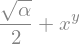

In [12]:
expr

Lists of symbols can be created with the following notation

In [18]:
symbols("x0:10")

### Basic manipulation with the expressions
#### Polynomials and rational functions

In [15]:
(x+y)**10

Polynomials can be expanded

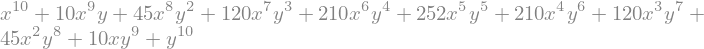

In [16]:
expand(_)

and, more importantly, factorized

In [17]:
factor(_)

In [18]:
_.subs(x+y, z)

We can collect the terms with the same power of a given variable

In [23]:
collect(y*x**2 + 3*x**2 - x*y + x - 1, x)

Cancel rational functions

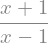

In [19]:
cancel((x**2 + 2*x + 1)/(x**2 - 1))

or decompose them into partial fractions

In [25]:
apart((x**3 + 4*x - 1)/(x**2 - 1))

#### Trigonometric functions

In [20]:
sin(x+y)

In [21]:
expand(_, trig=True)

In [28]:
trigsimp(_)

In [29]:
trigsimp(sin(x)**2 + cos(x)**2)

#### Exponentiation

In [30]:
x**alpha * y**alpha

In [31]:
powsimp(_)

Note that symbols in SymPy are complex by default. However, $x^\alpha y^\alpha$ does not equal $(xy)^\alpha$ in general. For example $\sqrt{-1}\sqrt{-1} \neq \sqrt{-1\cdot-1}$.

It is valid for $x, y \ge 0$ and $\alpha\in\mathbb R$ and we have to define the symbols as such.

Similarly $(x^a)^b = x^{ab}$ holds only for $b\in\mathbb Z$

In [32]:
x_pos, y_pos = symbols("x_pos, y_pos", positive=True)
alpha_R = symbols("alpha_R", real=True)
beta_Z = symbols("beta_Z", integer=True)

In [33]:
powsimp(x_pos**alpha_R * y_pos**alpha_R)

In [34]:
(expand_power_base(_))

In [35]:
(z**delta)**beta_Z

In [36]:
log(x_pos**alpha_R * y_pos)

In [37]:
expand_log(_)

In [38]:
logcombine(_)

The need for assumptions can be avoided using `force=True` (not recommended :)

In [39]:
expand_log(log(x**alpha * y))

In [40]:
expand_log(log(x**alpha * y), force=True)

#### Rewriting functions

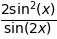

In [41]:
tan(x).rewrite(sin)

Note that there are many special functions defined in SymPy...

In [42]:
factorial(x).rewrite(gamma)

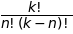

In [43]:
k, m, n = symbols('k, m, n')
binomial(k, n).rewrite(factorial)

In [44]:
binomial(k, k-2)

In [45]:
combsimp(_)

#### Equation solving
Equations are defined using `Eq`. Note that `=` is assignment and `==` tests for exact identity of two expressions

In [23]:
Eq(x**2, 1)

`solveset` attempts to find all solutions of the given equation. If it fails, you may try to use `solve`...

In [47]:
solveset(_, x)

In [48]:
solveset(sin(x), x)

In [49]:
solveset(x**2+1, x)

In [50]:
solveset(x**2+1, x, domain=S.Reals)

In [51]:
solveset(exp(x)-1, x)

In [52]:
solveset(exp(x) > 1, x, domain=S.Reals)

In [53]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

In [54]:
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

## Sympy internals
Expressions are represented as trees. This can be seen by printing with srepr

In [55]:
x*y

In [56]:
srepr(x*y)

"Mul(Symbol('x'), Symbol('y'))"

In [57]:
from IPython.display import Image
def show_tree(expr):
    with open("xy.dot", "w") as f:
        f.write(dotprint(expr))
    !dot xy.dot -Tpng > xy.png
    return Image(filename='xy.png') 

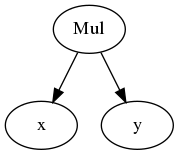

In [58]:
show_tree(x*y)

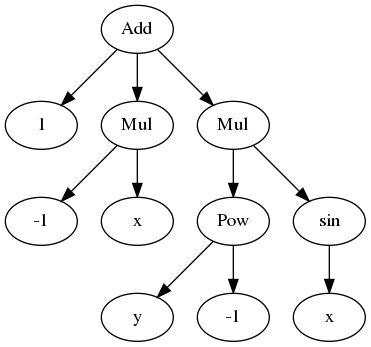

In [59]:
expr = sin(x)/y+1-x
show_tree(expr)

In [60]:
expr.func

sympy.core.add.Add

In [61]:
expr.args

In [62]:
expr.args[1].func

sympy.core.mul.Mul

In [63]:
expr.args[1].args